## 예제 11-1. Prophet 모델 실습

### 1) 위키백과페이지 조회수 데이터 모델화

#### Prophet 모델: 예측

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot ## conda(pip) install plotly prophet을 통해 설치 conda 환경에서는 필히 conda로 설치

ImportError: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.

ImportError: numpy._core.multiarray failed to import

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

In [3]:
pro = Prophet(changepoint_prior_scale=0.05)
pro.fit(df)

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [4]:
future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

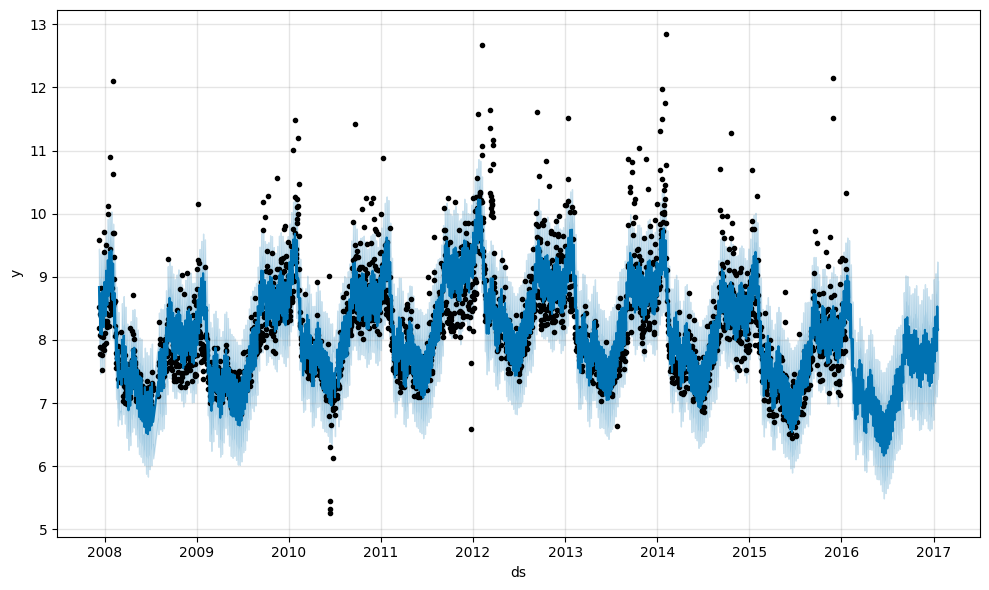

In [5]:
fig1 = pro.plot(forecast)

#### Prophet 모델: 분해

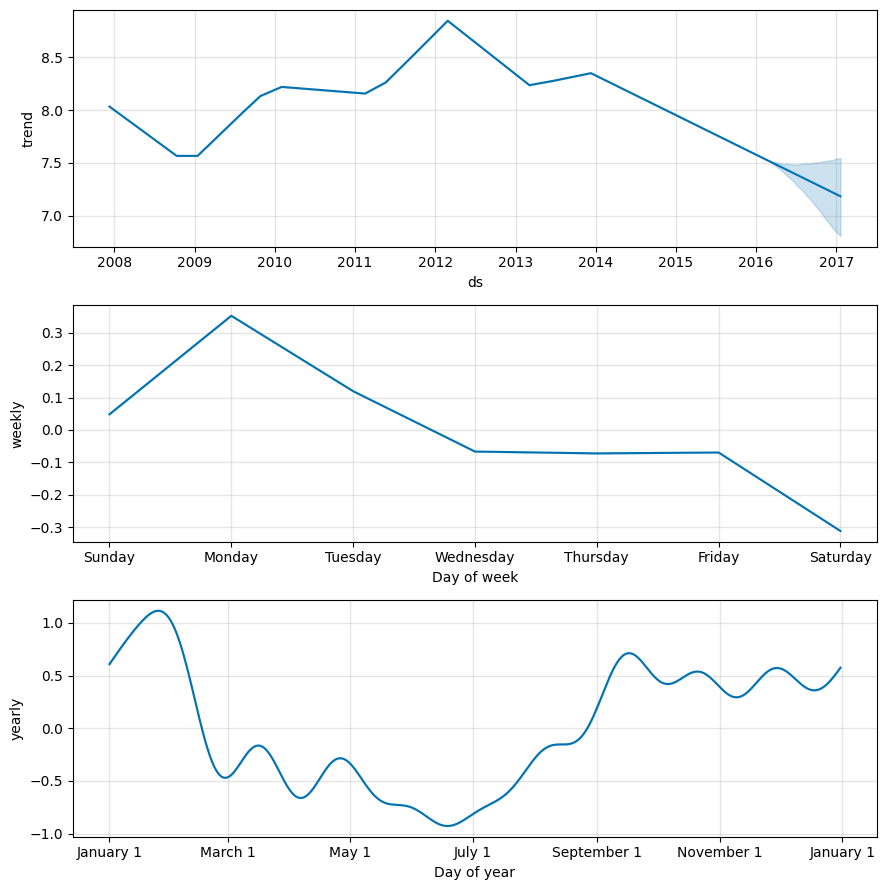

In [6]:
fig2 = pro.plot_components(forecast)

#### Prophet 모델: 추세

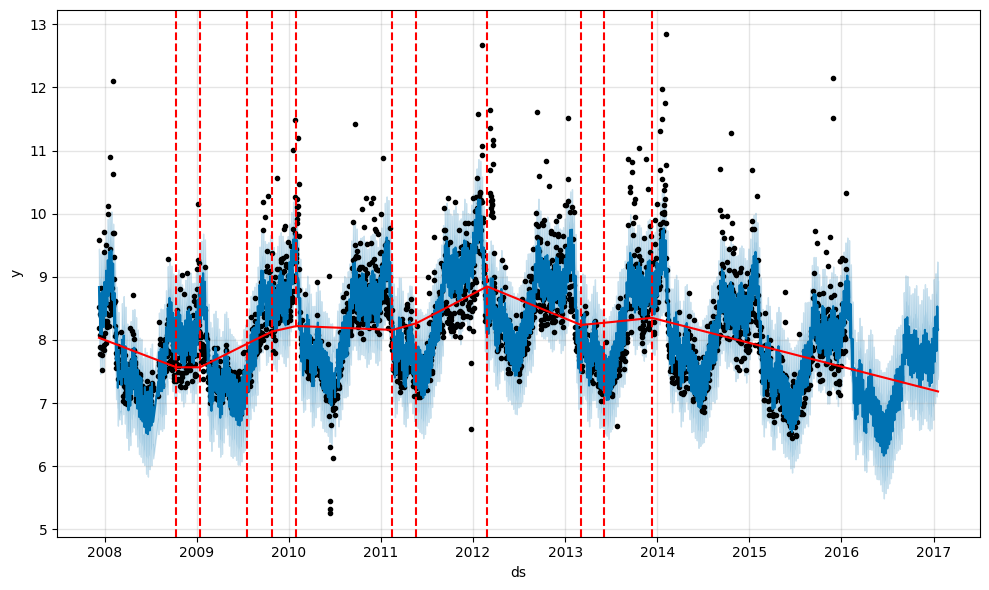

In [7]:
fig = pro.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro, forecast)

18:15:47 - cmdstanpy - INFO - Chain [1] start processing
18:15:48 - cmdstanpy - INFO - Chain [1] done processing


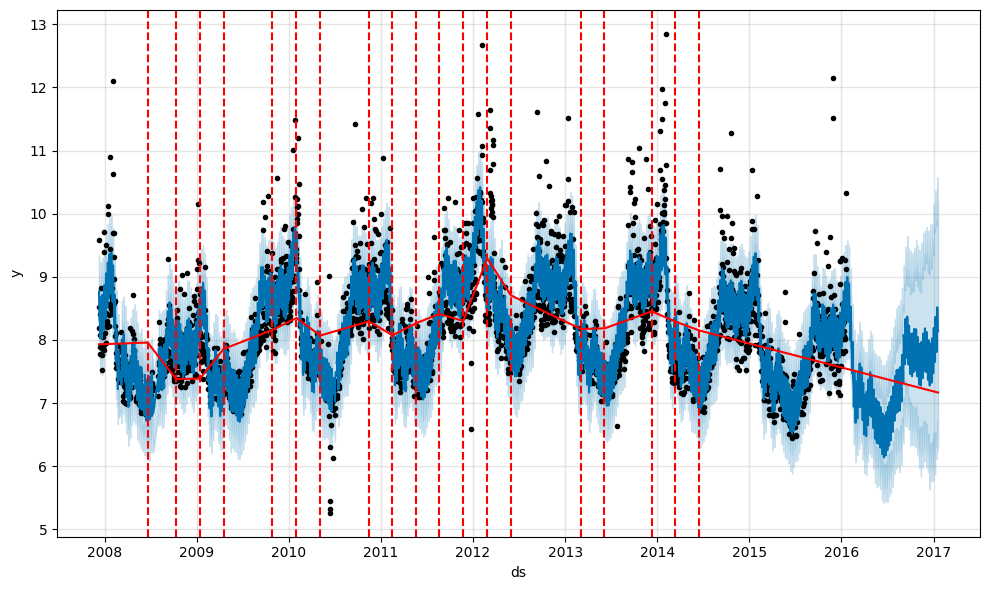

In [8]:
pro = Prophet(changepoint_prior_scale=0.3)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro, forecast)

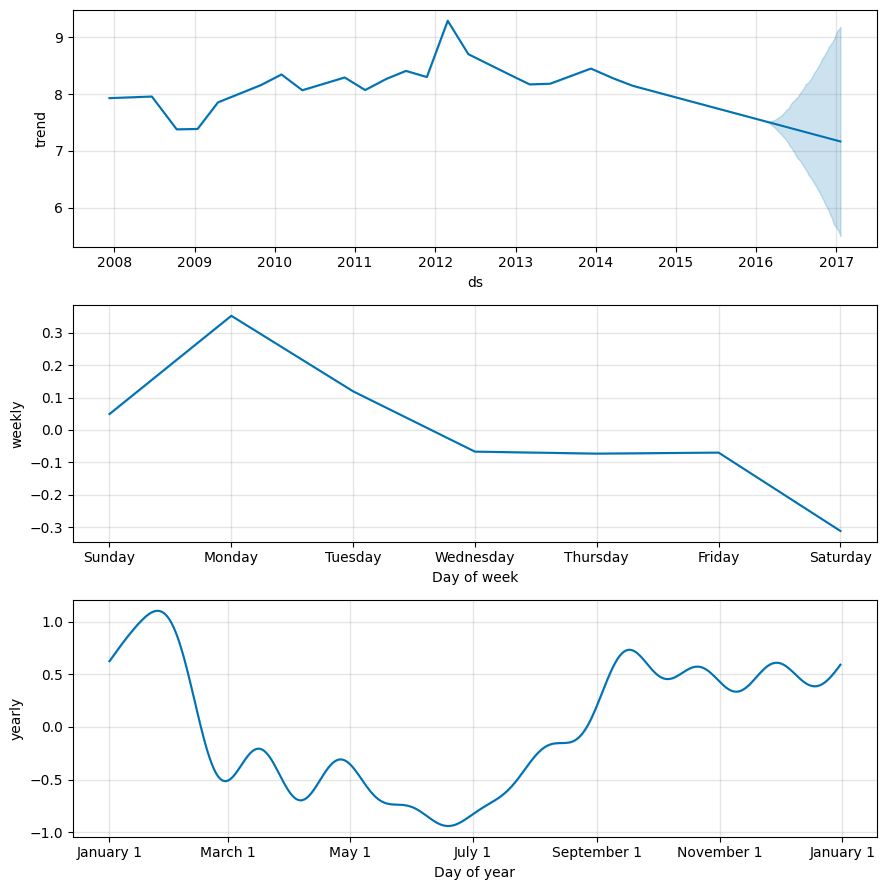

In [9]:
fig2 = pro.plot_components(forecast)

#### Prophet 모델: 연간 계절성

##### 모델 피팅, 분해 및 예측 시각화 (연간 계절성 10)

18:15:50 - cmdstanpy - INFO - Chain [1] start processing
18:15:50 - cmdstanpy - INFO - Chain [1] done processing


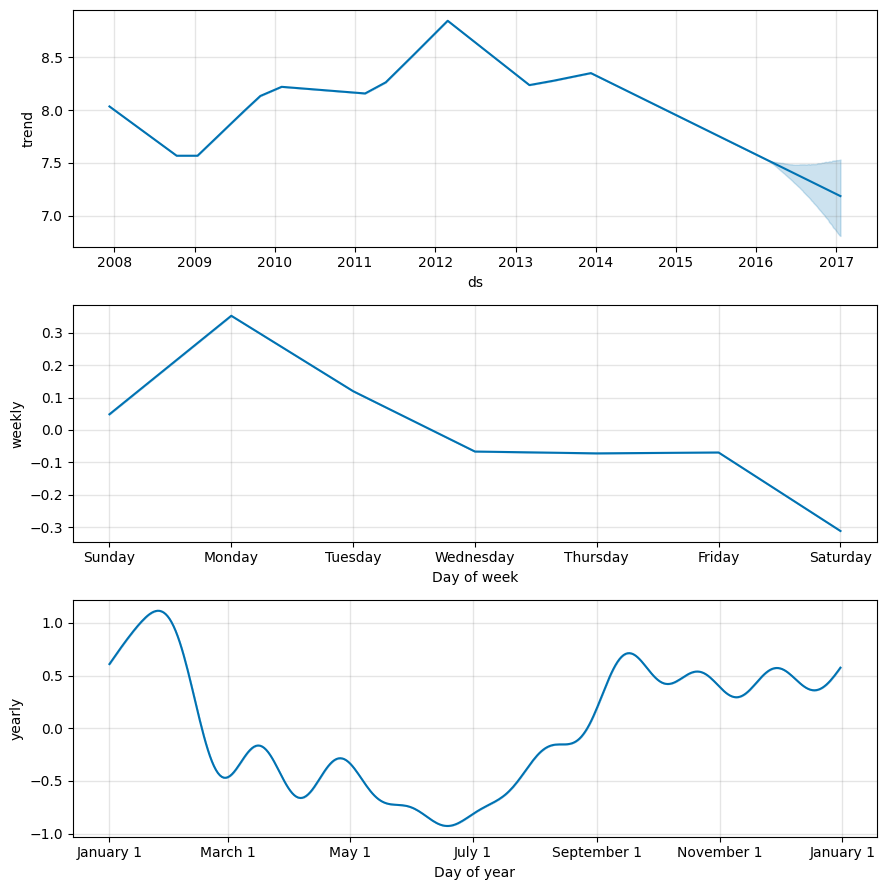

In [10]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

##### 모델 피팅, 분해 및 예측 시각화 (연간 계절성 20)

18:15:51 - cmdstanpy - INFO - Chain [1] start processing
18:15:52 - cmdstanpy - INFO - Chain [1] done processing


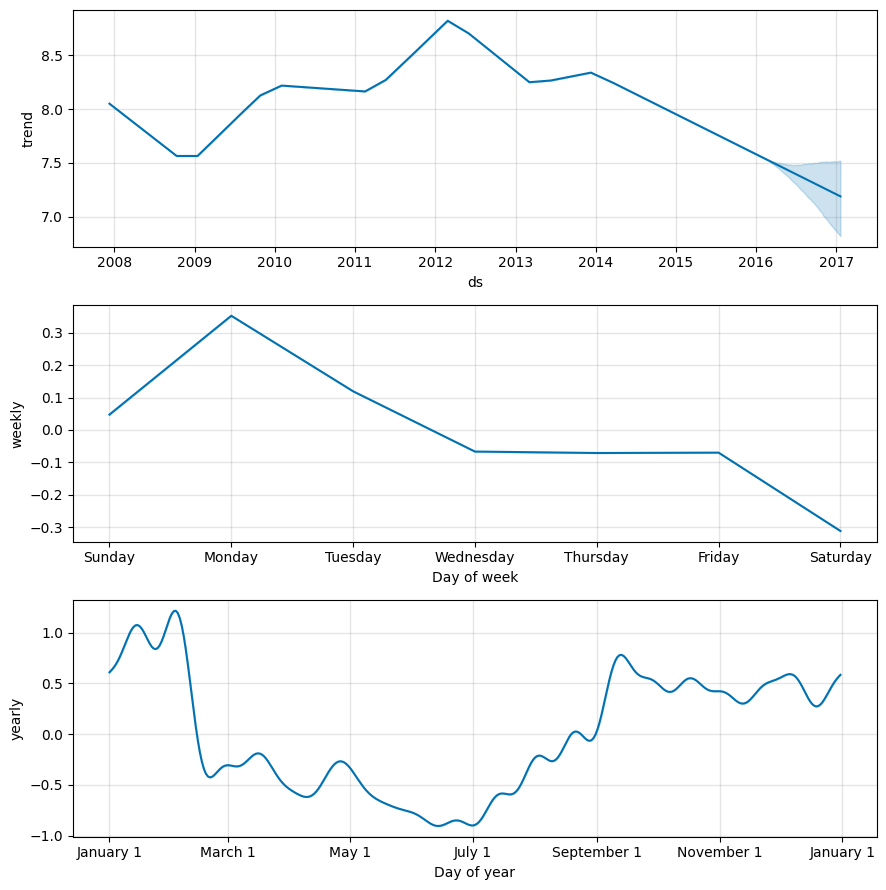

In [11]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=20,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

##### 예측 (연간 계절성 10)

18:15:53 - cmdstanpy - INFO - Chain [1] start processing
18:15:54 - cmdstanpy - INFO - Chain [1] done processing


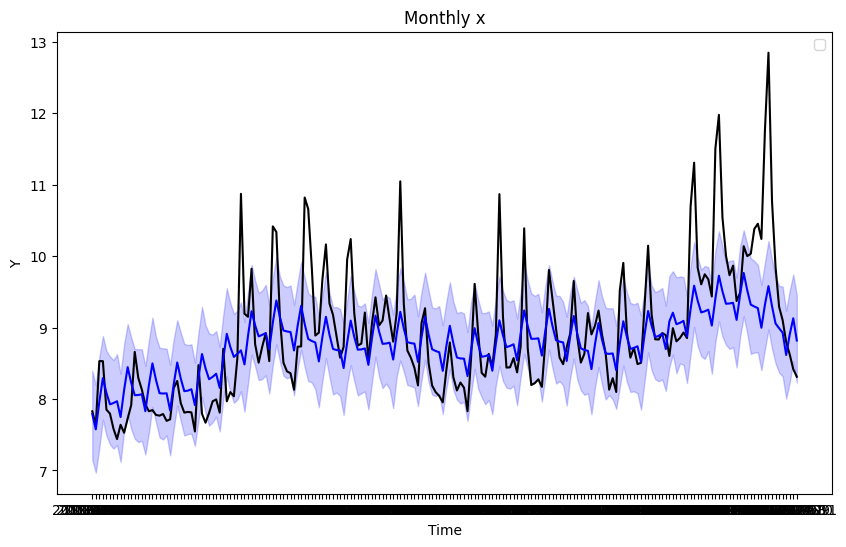

In [12]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[2000:2200]
plt.figure(figsize=(10, 6))
plt.plot(df[2000:2200].ds, df[2000:2200].y, color='black')
plt.plot(df[2000:2200].ds, tmp.yhat, color='b')
plt.fill_between(df[2000:2200].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Monthly x')
plt.legend()
plt.show()

#### Prophet 모델: 월간 계절성

18:15:56 - cmdstanpy - INFO - Chain [1] start processing
18:15:56 - cmdstanpy - INFO - Chain [1] done processing


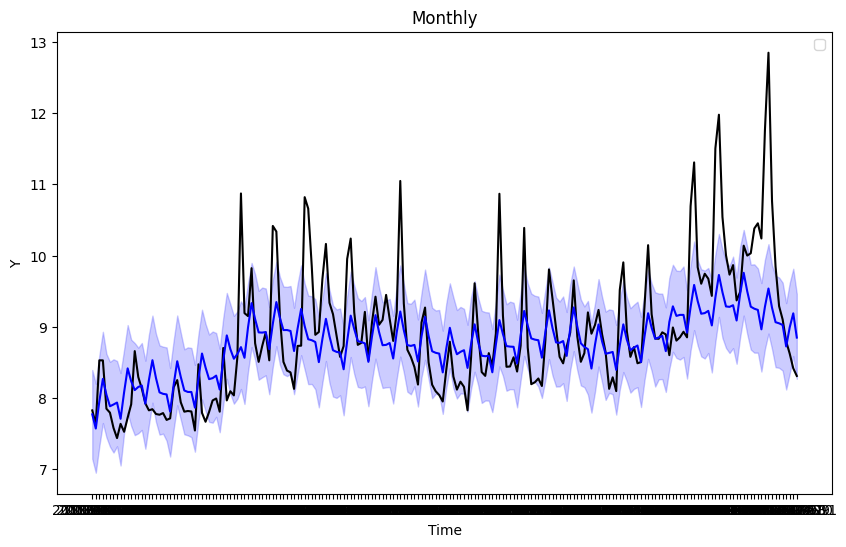

In [13]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.add_seasonality(name='monthly', period=30.5, fourier_order=5)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[2000:2200]
plt.figure(figsize=(10, 6))
plt.plot(df[2000:2200].ds, df[2000:2200].y, color='black')
plt.plot(df[2000:2200].ds, tmp.yhat, color='b')
plt.fill_between(df[2000:2200].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Monthly')
plt.legend()
plt.show()

#### Prophet 모델: 주간 계절성

18:15:58 - cmdstanpy - INFO - Chain [1] start processing
18:16:00 - cmdstanpy - INFO - Chain [1] done processing


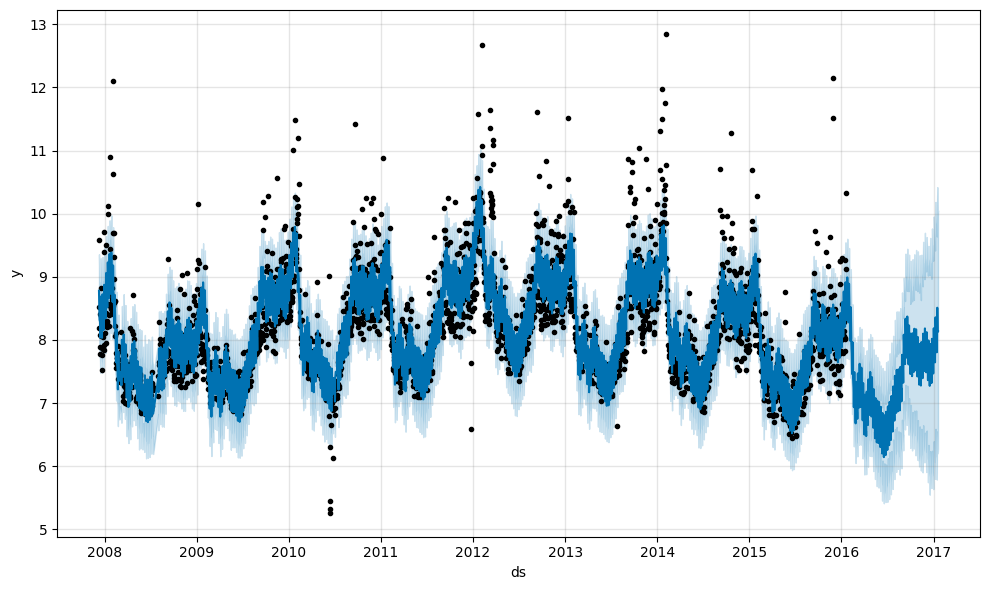

In [14]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)

#### Prophet 모델: 승산 모형

18:16:01 - cmdstanpy - INFO - Chain [1] start processing
18:16:03 - cmdstanpy - INFO - Chain [1] done processing


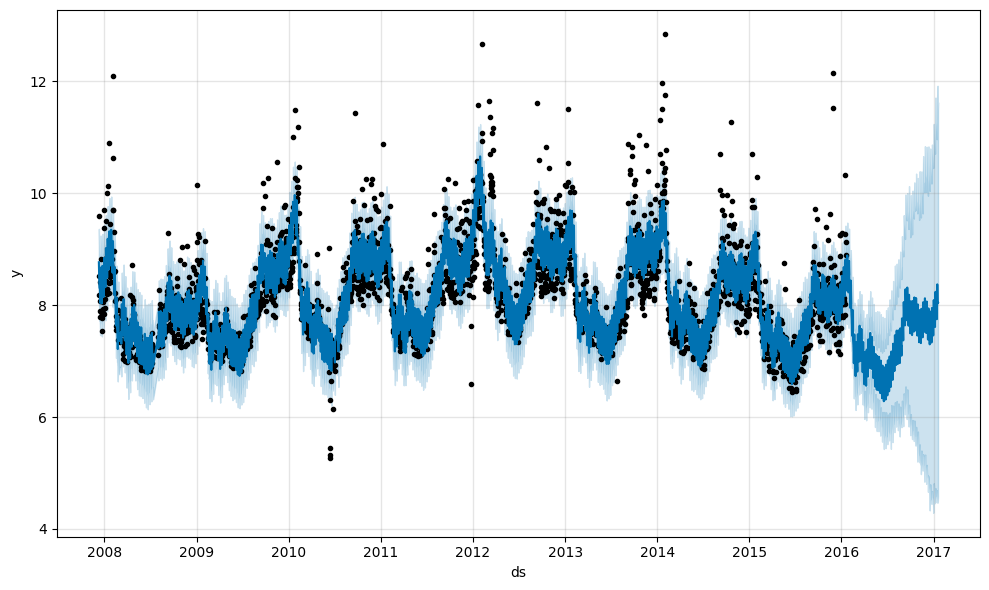

In [15]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)

#### Prophet 모델: 휴일 효과

18:16:04 - cmdstanpy - INFO - Chain [1] start processing
18:16:06 - cmdstanpy - INFO - Chain [1] done processing


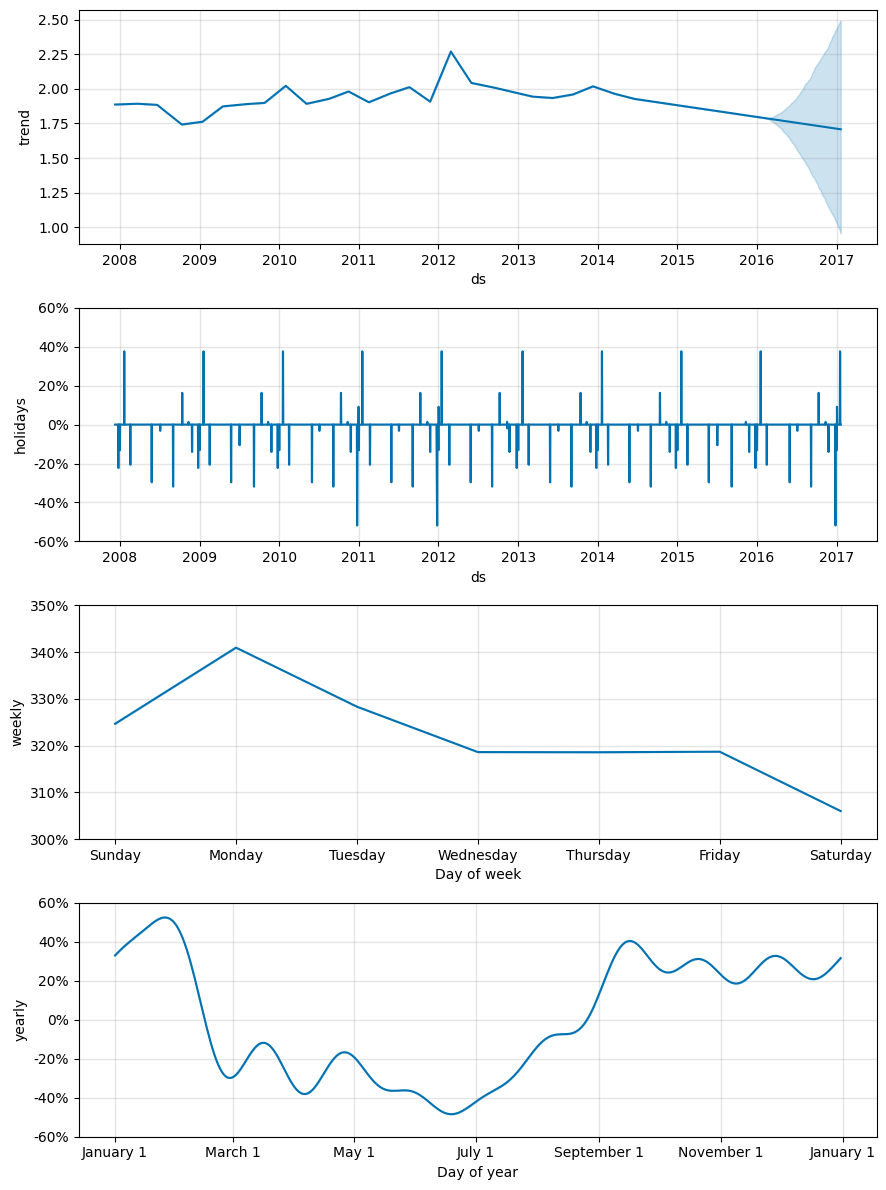

In [16]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.add_country_holidays(country_name='US')
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

18:16:08 - cmdstanpy - INFO - Chain [1] start processing
18:16:09 - cmdstanpy - INFO - Chain [1] done processing


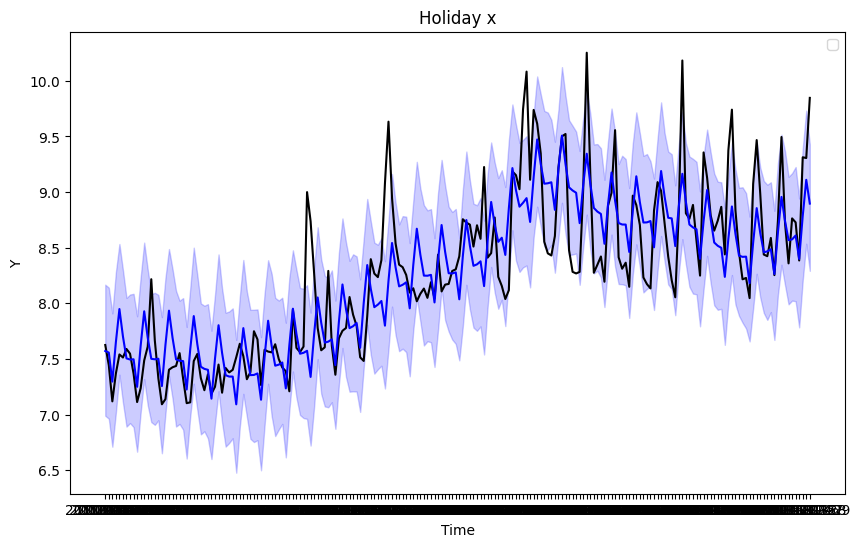

In [17]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[1200:1400]
plt.figure(figsize=(10, 6))
plt.plot(df[1200:1400].ds, df[1200:1400].y, color='black')
plt.plot(df[1200:1400].ds, tmp.yhat, color='b')
plt.fill_between(df[1200:1400].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Holiday x')
plt.legend()
plt.show()

18:16:11 - cmdstanpy - INFO - Chain [1] start processing
18:16:13 - cmdstanpy - INFO - Chain [1] done processing


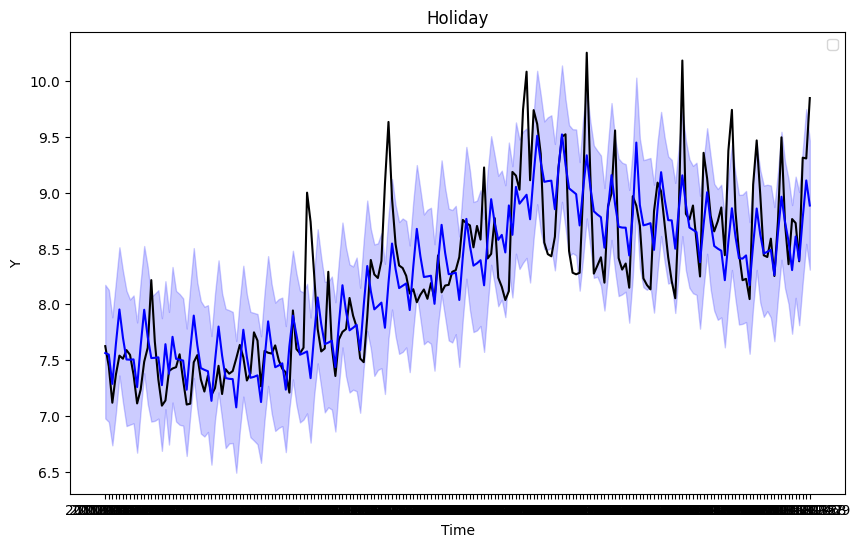

In [18]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.add_country_holidays(country_name='US')
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[1200:1400]
plt.figure(figsize=(10, 6))
plt.plot(df[1200:1400].ds, df[1200:1400].y, color='black')
plt.plot(df[1200:1400].ds, tmp.yhat, color='b')
plt.fill_between(df[1200:1400].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Holiday')
plt.legend()
plt.show()

### 2) 빅토리아주 전기 수요 데이터

#### 데이터 전처리

In [19]:
elec = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/vic_elec.csv')
elec['ds'] = pd.to_datetime(elec['Time'], format='mixed')
elec['y'] = elec['Demand']
elec = elec[['ds','y']]

#### 모델 피팅 및 예측

In [20]:
pro = Prophet(
    weekly_seasonality=5,
    yearly_seasonality=3,
    daily_seasonality=10,
)
pro.fit(elec)

future = pro.make_future_dataframe(periods=50)
forecast = pro.predict(future)

18:16:19 - cmdstanpy - INFO - Chain [1] start processing
18:16:52 - cmdstanpy - INFO - Chain [1] done processing


#### 시각화

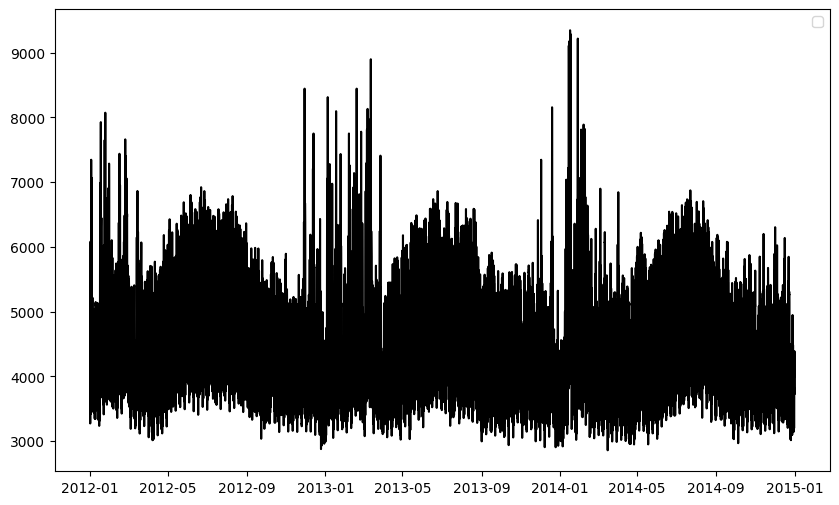

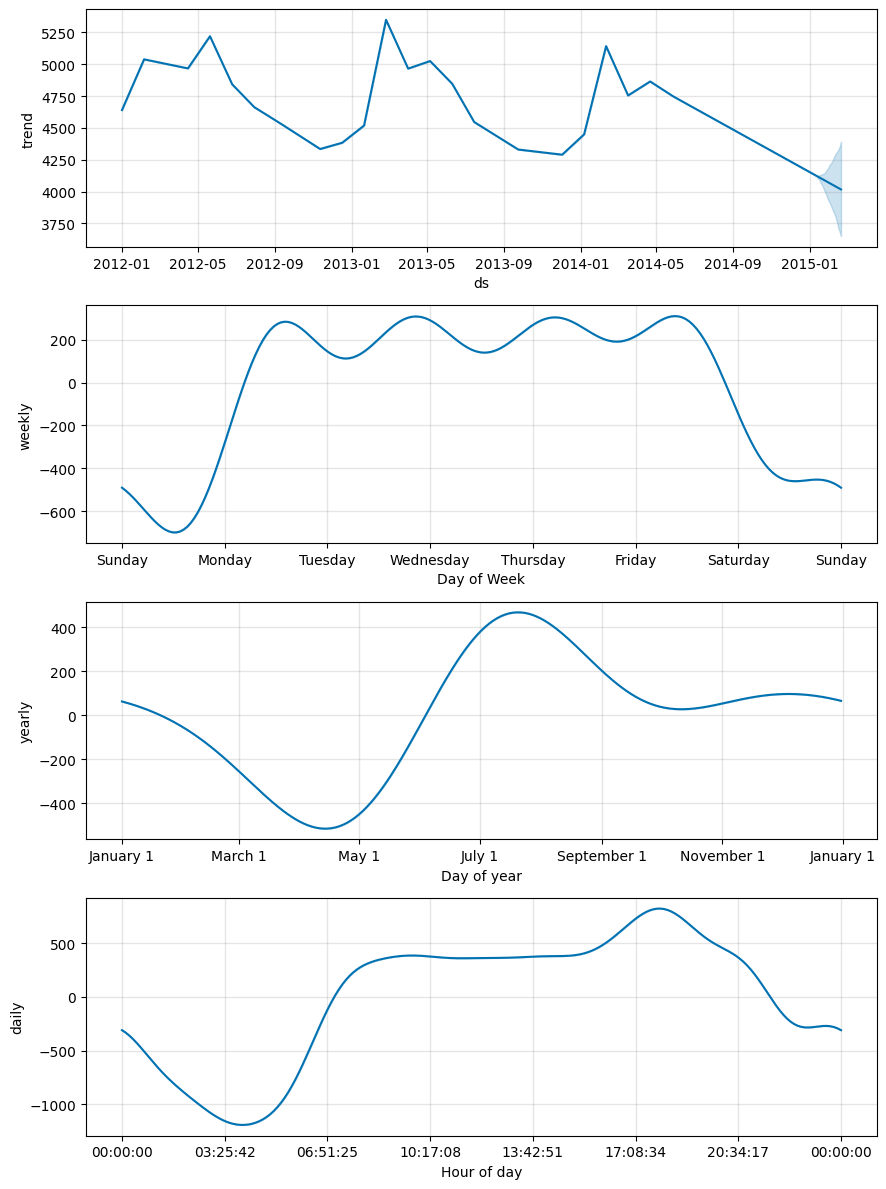

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(elec['ds'], elec['y'], color='black')
plt.legend()
plt.show()
fig = pro.plot_components(forecast)

## 예제 11-2. 호주 생산량 데이터 예측 비교 예시

### 호주 생산량 데이터 예측 그래프

#### 필요한 패키지 불러오기

In [22]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### 데이터 전처리

In [23]:
aus_prod = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/aus_production.csv')
aus_prod['y'] = aus_prod['Cement']
aus_prod['ds'] = pd.date_range(start='2/3/1956',periods=218, freq='3MS')
aus_prod = aus_prod[['y', 'ds']]
aus_prod = aus_prod[aus_prod['ds']>='1988-01-01']
df = aus_prod[aus_prod['ds']<='2007-12-31']

#### Prophet 예측

In [24]:
pro = Prophet(
    weekly_seasonality=10,
    yearly_seasonality=2,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=11, freq='Q')
forecast = pro.predict(future)
result_pro = forecast[forecast['ds']>='2008-01-01']

18:17:01 - cmdstanpy - INFO - Chain [1] start processing
18:17:02 - cmdstanpy - INFO - Chain [1] done processing


#### ETS 예측

In [25]:
df_series = pd.Series(list(df['y']), df['ds'])
fit_cem = ETSModel(df_series, trend='add', seasonal='add').fit()
forecast_cem = fit_cem.forecast(10)

#### ARIMA 예측

In [26]:
model = auto_arima(df_series, seasonal=True, m=4, trace=True,
                   error_action='ignore', suppress_warnings=True,
                   stepwise=True)
predictions = model.predict(n_periods=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=1047.603, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=1006.810, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=1013.900, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=1046.119, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=1044.177, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[4] intercept   : AIC=1005.791, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[4] intercept   : AIC=987.959, Time=0.22 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(2,0,2)[4] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(1,0,2)[4] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(2,0,1)[4] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,0)(2,0,1)[4] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(2,0,1)[4] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(2,0,1)[4] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2

#### 시각화

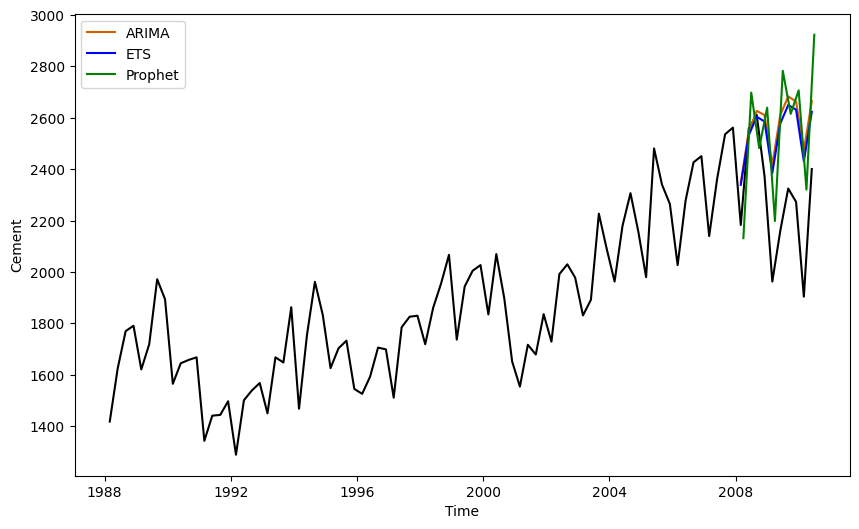

In [27]:
ans = aus_prod[aus_prod['ds'] <= '2010-07-01']

plt.figure(figsize=(10, 6))
plt.plot(ans['ds'], ans['y'], color='black')
plt.plot(predictions, label='ARIMA', color='#D55E00')
plt.plot(forecast_cem, label='ETS', color='b')
plt.plot(result_pro['ds'], result_pro['yhat'], label='Prophet', color='green')
plt.xlabel('Time')
plt.ylabel('Cement')
plt.legend()
plt.show()

#### 평가

In [28]:
ans = ans[ans['ds'] >= '2008-01-01']


print(f"ARIMA) MSE: {mean_squared_error(ans['y'], predictions.values)} MAE: {mean_absolute_error(ans['y'], predictions.values)} MAPE: {mean_absolute_percentage_error(ans['y'], predictions.values)}")
print(f"ETS) MSE: {mean_squared_error(ans['y'], forecast_cem.values)} MAE: {mean_absolute_error(ans['y'], forecast_cem.values)} MAPE: {mean_absolute_percentage_error(ans['y'], forecast_cem.values)}")
print(f"Prophet) MSE: {mean_squared_error(ans['y'], result_pro['yhat'])} MAE: {mean_absolute_error(ans['y'], result_pro['yhat'])} MAPE: {mean_absolute_percentage_error(ans['y'], result_pro['yhat'])}")

ARIMA) MSE: 116817.13719524941 MAE: 291.6181773537507 MAPE: 0.13608994125357982
ETS) MSE: 98468.17003401078 MAE: 267.58776888273917 MAPE: 0.1249872783215507
Prophet) MSE: 127377.28883601798 MAE: 311.067972210829 MAPE: 0.1401375824491196
